# Đọc dữ liệu

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 21:53:34 2015

@author: nymph
"""


#################################### Read the data ############################
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import numpy as np

''' read_csv()
The read_csv() function in pandas package parse an csv data as a DataFrame data structure. What's the endpoint of the data?
The data structure is able to deal with complex table data whose attributes are of all data types. 
Row names, column names in the dataframe can be used to index data.
'''

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", 
                   delim_whitespace = True, 
                   header=None, 
                   names = ['mpg', 'cylinders', 
                            'displacement', 'horsepower', 
                            'weight', 'acceleration', 
                            'model', 'origin', 'car_name'])

# data['mpg']
# data.mpg
# data.iloc[0,:]

data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [2]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [3]:
data.to_csv("ex3_data.csv")

# Câu 1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model         406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [5]:
data['car_name'].nunique()

312

# Câu 2

#### a. How many distinct car companies are represented in the data set?

Sau khi tìm hiểu, chúng em đã tìm ra được rằng, đa số tên của thuộc tính `car_name` có trong dữ liệu, từ đầu tiên chính là tên của công ty sản xuất ra nó (<i>chevrolet chevelle malibu</i> có tên công ty sản xuất là <i>chevrolet</i>). Ta sẽ tách lấy từ đầu tiên của mỗi giá trị `car_name` và lưu nó vào thuộc tính `company_name`

In [6]:
data['company_name'] = data['car_name'].str.split().str.get(0)

In [7]:
company_count = data['company_name'].nunique()
company_name = data['company_name'].unique()
print(f'Number of car company: {company_count}')
print(f'List of car company: {company_name}')

Number of car company: 38
List of car company: ['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'citroen' 'dodge'
 'toyota' 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan']


Theo kết quả trả về, có tổng cộng 38 công ty về xe hơi khác nhau trong tập dữ liệu được cung cấp. Tuy nhiên, ta có thể thấy một số vấn đề như sau:
- Một số công ty có tên đang bị viết sai chính tả (<i>maxda</i> thay vì <i>mazda</i>) 
- Một số khác được viết bằng tên viết tắt (<i>chevy</i> thay vì <i>chevrolet</i>)
- Một số xe có từ đầu tiên mang tên thương hiệu trực thuộc công ty mẹ (<i>datsun</i> là tên thương hiệu xe trực thuộc công ty <i>nissan</i>)
- Tên công ty không rõ ràng: công ty <i>hi</i>

Sau khi tìm hiểu, nhóm đã thay thế một số tên gọi cho phù hợp với tên công ty

In [8]:
data['company_name'] = data['company_name'].replace(['volkswagen','vokswagen','vw'],'volkswagen')
data['company_name'] = data['company_name'].replace('maxda','mazda')
data['company_name'] = data['company_name'].replace('toyouta','toyota')
data['company_name'] = data['company_name'].replace('mercedes','mercedes-benz')
data['company_name'] = data['company_name'].replace('datsun','nissan')
data['company_name'] = data['company_name'].replace('capri','ford')
data['company_name'] = data['company_name'].replace(['chevroelt','chevy'],'chevrolet')

Riêng với công ty "hi", nhóm đã thử tìm kiếm thông tin những chiếc xe thuộc công ty trên, nhưng do chỉ có một kết quả, nên có khá ít thông tin tìm kiếm được và không thể chắc chắn tên đúng của công ty là gì. Do đó, nhóm giữ nguyên tên của công ty là "hi"

In [9]:
data[data['company_name'] == "hi"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,company_name
34,9.0,8.0,304.0,193.0,4732.0,18.5,70.0,1.0,hi 1200d,hi


Sau khi thay thế, kiểm tra lại kết quả

In [10]:
company_count = data['company_name'].nunique()
company_name = data['company_name'].unique()
print(f'Number of car company: {company_count}')
print(f'List of car company: {company_name}')

Number of car company: 29
List of car company: ['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'citroen' 'dodge'
 'toyota' 'nissan' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'honda' 'subaru' 'mercedes-benz' 'cadillac' 'triumph']


Vậy tổng cộng có khoảng 29 công ty xe hơi khác nhau trong bộ dữ liệu trên

#### b. What is the name of the car with the best MPG?

In [11]:
car_with_best_MPG =  data.sort_values(by = ['mpg'], ascending=False).head(1)
car_with_best_MPG

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,company_name
329,46.6,4.0,86.0,65.0,2110.0,17.9,80.0,3.0,mazda glc,mazda


Vậy xe có MPG tốt nhất là <b>mazda glc</b>

#### c. What car company produced the most 8-cylinder cars?

In [12]:
group_data = data.groupby(by = ['company_name','cylinders']).size().reset_index(name='counts')
group_data[group_data['cylinders']==8].sort_values(by = ['counts'], ascending=False).head(1)

,company_name,cylinders,counts
23,ford,8.0,22


Công ty sản xuất nhiều xe 8 xylanh nhiều nhất là <b>Ford</b>

#### d. What are the names of 3-cylinder cars? Do some internet search that can tell you about the history and popularity of those 3-cylinder cars.

In [13]:
three_cylinder_car = data[data['cylinders']==3]['car_name']
three_cylinder_car

78     mazda rx2 coupe
118          maxda rx3
250         mazda rx-4
341      mazda rx-7 gs
Name: car_name, dtype: object

Ta có 4 hãng xe có 3 xylanh với tên gọi như trên

# Câu 3

In [14]:
def missing_ratio(s):
    return s.isna().mean() * 100
    
missing_df = data.iloc[:, :-1].agg([missing_ratio])
describe_df = pd.concat([data.describe(), missing_df])
describe_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000,NaN
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966,NaN
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000,NaN
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,NaN
missing_ratio,1.970443,0.000000,0.000000,1.477833,0.000000,0.000000,0.000000,0.000000,0.0


# Câu 4

In [15]:
data.agg(lambda x: x.nunique())

mpg             129
cylinders         5
displacement     83
horsepower       93
weight          356
acceleration     96
model            13
origin            3
car_name        312
company_name     29
dtype: int64

In [16]:
def find_bins(x):
    q25, q75 = np.percentile(x, [25, 75])
    bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
    bins = round((x.max() - x.min()) / bin_width)
    return bins

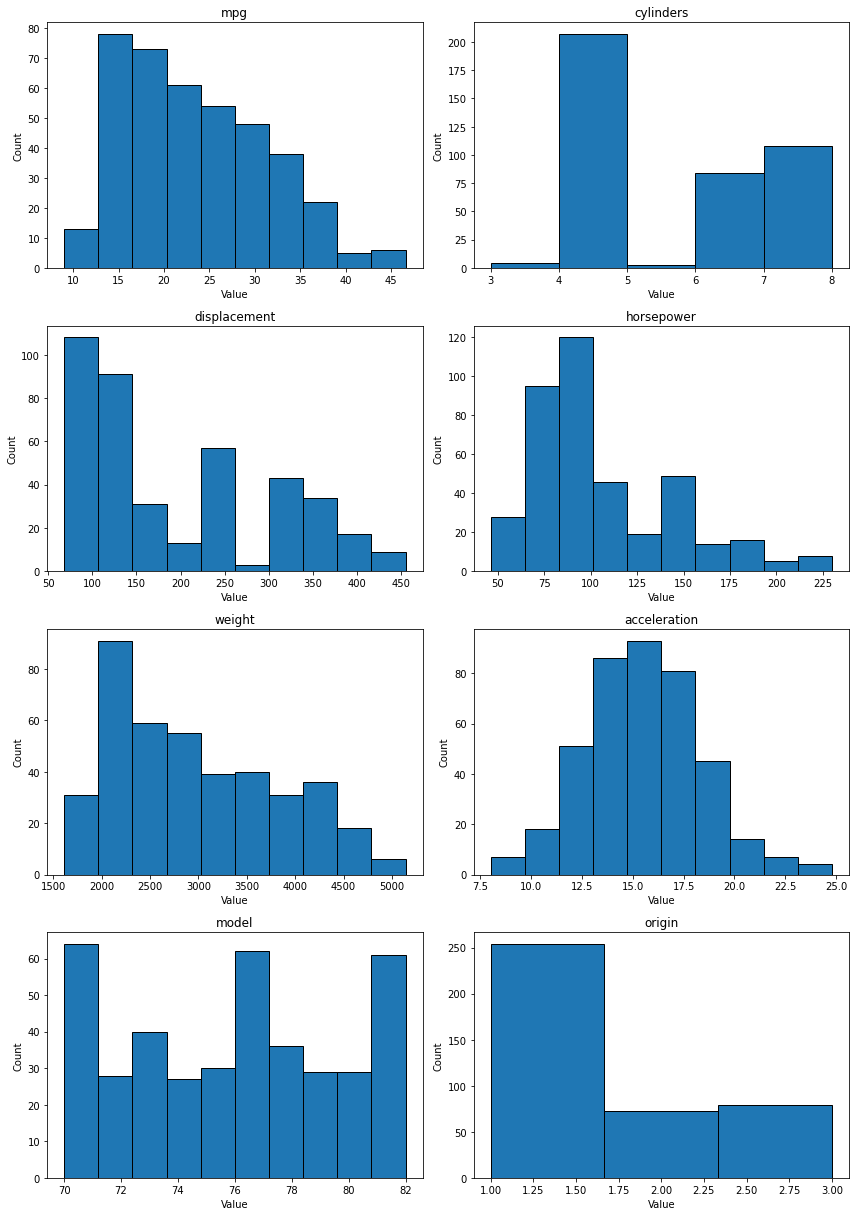

In [17]:
cate_cols = ['cylinders','origin']
fig, axes = plt.subplots(4, 2, figsize=(12, 17))
cols = data.columns

axes = axes.ravel()

for idx,ax in enumerate(axes):
    if cols[idx] in (cate_cols):
        ax.hist(data[cols[idx]], bins=data[cols[idx]].nunique(), edgecolor='black')
    else:
        ax.hist(data[cols[idx]], edgecolor='black')
    ax.set_title(cols[idx])
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    
fig.tight_layout()
plt.show()
    

# Câu 5

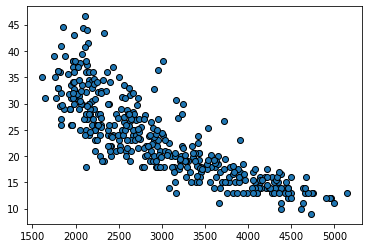

In [18]:
plt.scatter(x='weight', y='mpg', data=data, edgecolor='black');

In [19]:
corr = data[['weight', 'mpg']].corr()
corr.style.background_gradient(cmap='coolwarm')

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


# Câu 6

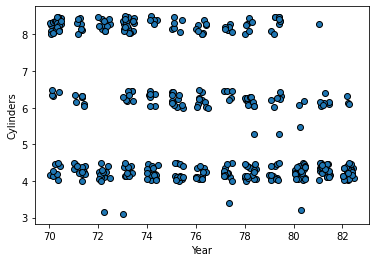

In [20]:
plt.scatter(
    data['model'] + np.random.random(len(data['model']))/2,
    data['cylinders'] + np.random.random(len(data['cylinders']))/2,
    edgecolors='black'
)
plt.xlabel('Year')
plt.ylabel('Cylinders')
plt.show()

# Câu 7

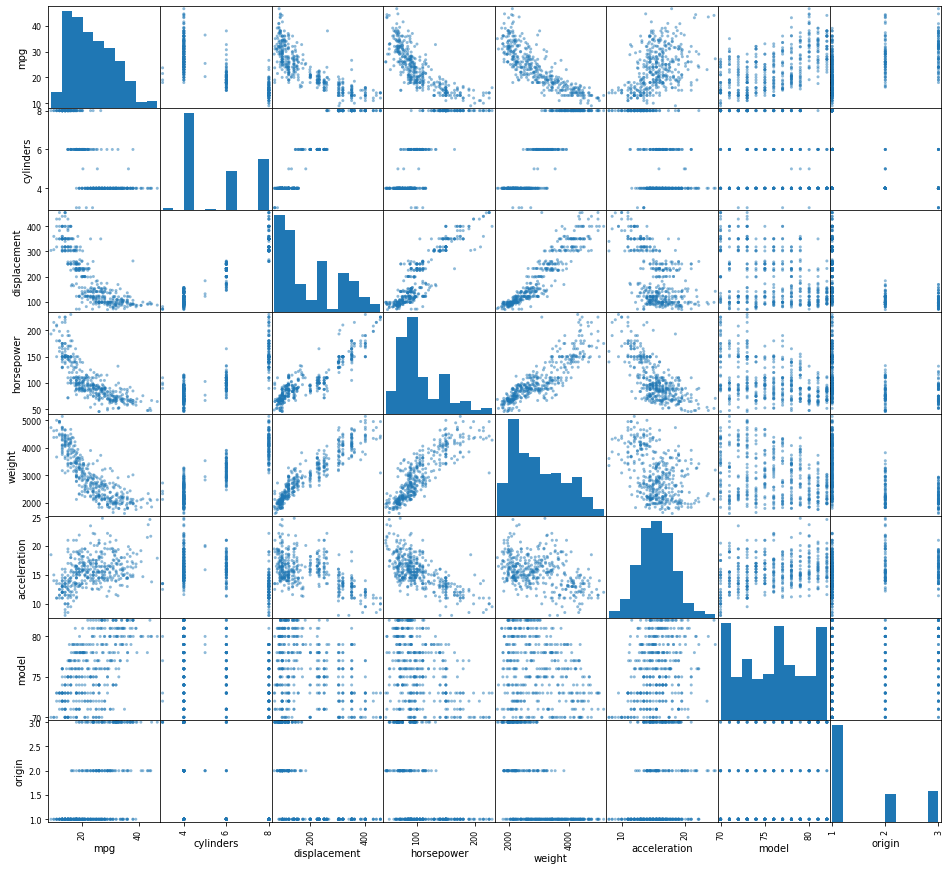

In [21]:
g = pd.plotting.scatter_matrix(data, figsize=(16,15))
plt.show()

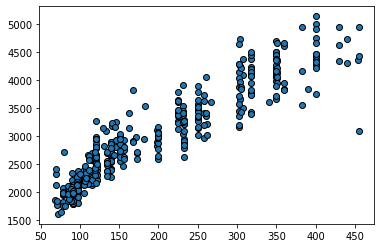

In [22]:
plt.scatter(x='displacement', y='weight', data=data, edgecolor='black');

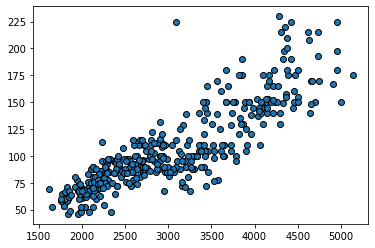

In [23]:
plt.scatter(x='weight', y='horsepower', data=data, edgecolor='black');

# Câu 8

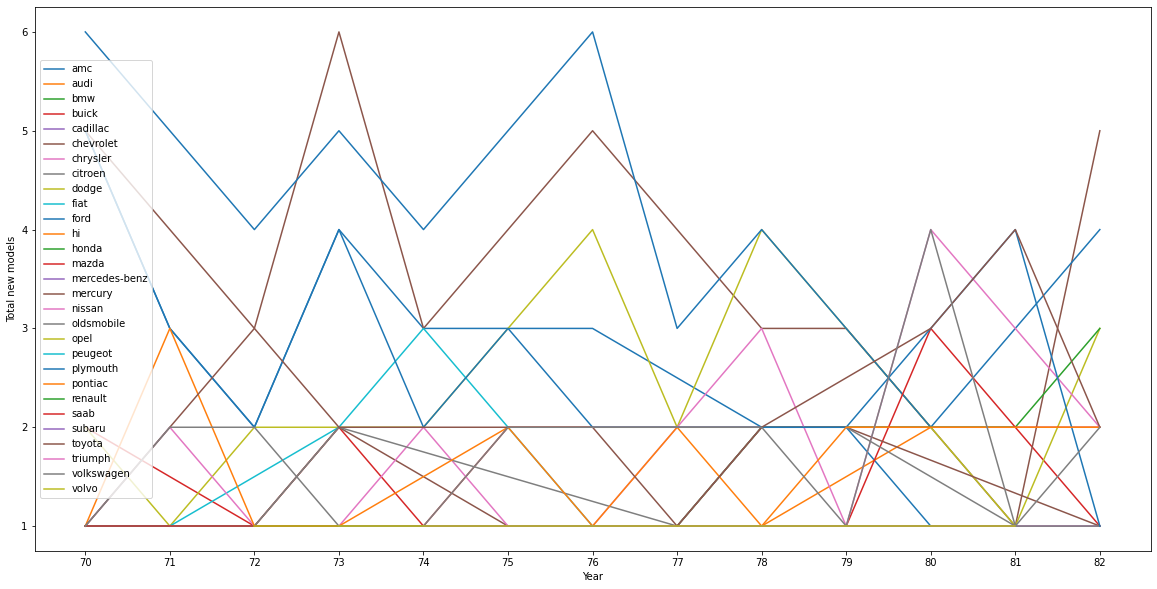

In [24]:
df_year = data.groupby(['model','company_name']).size().reset_index(name='counts')
df_year.set_index('company_name', inplace=True)

groups = df_year.groupby('company_name')
fig, ax = plt.subplots(figsize=(20, 10))

for name, group in groups:
    ax.plot(group.model, group.counts, label=name)
ax.legend()
plt.xticks(np.arange(70,83))

plt.xlabel("Year")
plt.ylabel("Total new models")
plt.show()

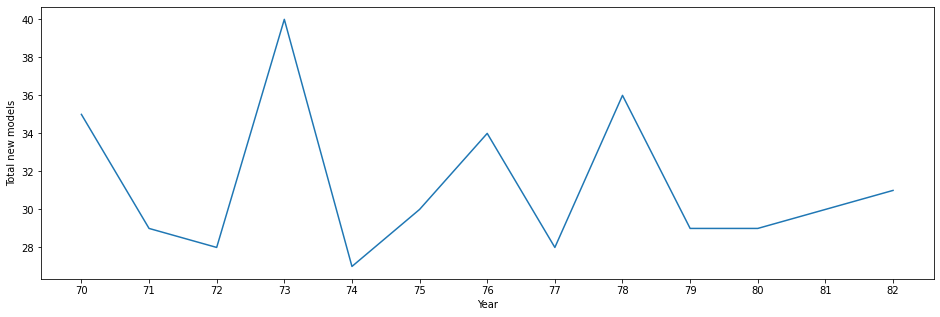

In [25]:
df_year = data.groupby('model').size().reset_index(name='count')
plt.figure(figsize=(16, 5))
plt.plot(df_year['model'], df_year['count'])
plt.xlabel("Year")
plt.ylabel("Total new models")
plt.xticks(np.arange(70,83))
plt.show()

# Câu 9

In [26]:
data_corr = data.iloc[:, :-1].corr()#, plt.pcolor()
data_corr.style.background_gradient(cmap='coolwarm')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452,-0.360762,-0.567478
displacement,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984,-0.381714,-0.613056
horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124,-0.424419,-0.460033
weight,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086,-0.315389,-0.584109
acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000,0.301992,0.218845
model,0.579267,-0.360762,-0.381714,-0.424419,-0.315389,0.301992,1.000000,0.187656
origin,0.563450,-0.567478,-0.613056,-0.460033,-0.584109,0.218845,0.187656,1.000000
